In [1]:
#Importing Libraries
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [3]:
import zipfile as zf
files = zf.ZipFile("Eyedataset.zip", 'r')
files.extractall('Eyedataset')
files.close()

In [2]:
#DataPreprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
data_dir = "C:/Users/TEJASWI/OneDrive/Documents/SE Project/Eyedataset"
train_datagen = ImageDataGenerator(validation_split=0.2)

train_generator = train_datagen.flow_from_directory( data_dir,
                                                     target_size=(32,32),
                                                     batch_size=32,
                                                     shuffle=True,
                                                     class_mode='categorical',
                                                     subset='training')

validation_datagen = ImageDataGenerator(validation_split=0.2)

validation_generator =  validation_datagen.flow_from_directory( data_dir,
                                                                target_size=(32,32),
                                                                batch_size=32,
                                                                class_mode='categorical',
                                                                subset='validation')   

Found 27281 images belonging to 15 classes.
Found 6810 images belonging to 15 classes.


In [3]:
resnet101_model = Sequential()

pretrained_model = tf.keras.applications.ResNet101(include_top=False,
                                                   input_shape=(32, 32, 3),
                                                   pooling='avg',
                                                   classes=15,
                                                   weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False

resnet101_model.add(pretrained_model)
resnet101_model.add(Flatten())
resnet101_model.add(Dense(128, activation='relu'))
resnet101_model.add(Dense(15, activation='softmax'))

In [4]:
from tensorflow.keras.optimizers import Adam
resnet101_model.compile(optimizer=Adam(learning_rate=0.001),
                        loss='categorical_crossentropy',
                        metrics=[tf.keras.metrics.CategoricalAccuracy(),
                                 tf.keras.metrics.Precision(),
                                 tf.keras.metrics.Recall()])

In [5]:
resnet101_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet101 (Functional)      (None, 2048)              42658176  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 128)               262272    
                                                                 
 dense_1 (Dense)             (None, 15)                1935      
                                                                 
Total params: 42922383 (163.74 MB)
Trainable params: 264207 (1.01 MB)
Non-trainable params: 42658176 (162.73 MB)
_________________________________________________________________


In [6]:
history = resnet101_model.fit(train_generator,
                                validation_data=validation_generator,
                               epochs=50)
   

Epoch 1/50

853/853 [==============================] - 495s 572ms/step - loss: 0.3463 - categorical_accuracy: 0.8962 - precision: 0.9343 - recall: 0.8669 - val_loss: 0.9478 - val_categorical_accuracy: 0.7305 - val_precision: 0.7834 - val_recall: 0.6953
Epoch 2/50
853/853 [==============================] - 470s 551ms/step - loss: 0.0960 - categorical_accuracy: 0.9689 - precision: 0.9746 - recall: 0.9637 - val_loss: 1.2360 - val_categorical_accuracy: 0.7048 - val_precision: 0.7302 - val_recall: 0.6852
Epoch 3/50
853/853 [==============================] - 644s 755ms/step - loss: 0.0612 - categorical_accuracy: 0.9809 - precision: 0.9834 - recall: 0.9783 - val_loss: 0.8918 - val_categorical_accuracy: 0.7863 - val_precision: 0.8048 - val_recall: 0.7731
Epoch 4/50
853/853 [==============================] - 518s 607ms/step - loss: 0.0590 - categorical_accuracy: 0.9812 - precision: 0.9831 - recall: 0.9794 - val_loss: 0.9475 - val_categorical_accuracy: 0.7966 - val_precision: 0.8107 - val_recall

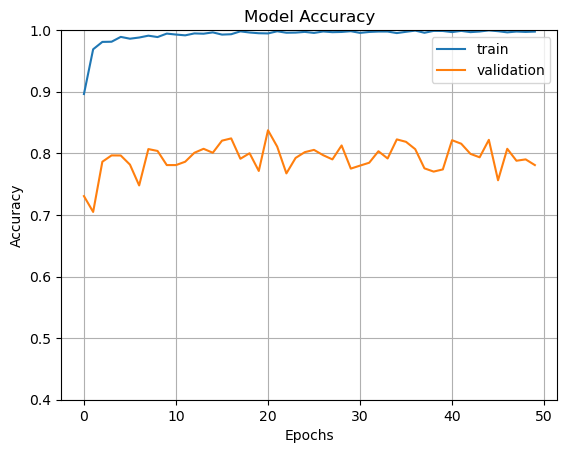

In [7]:
fig1 = plt.gcf()
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.axis(ymin=0.4,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [8]:
import cv2
import numpy as np
img_height, img_width = 32,32
image=cv2.imread(r"C:\Users\TEJASWI\OneDrive\Documents\SE Project\Eyedataset\s0001\s0001_00012_0_0_0_0_0_01.png")
image_resized= cv2.resize(image, (img_height,img_width))
image=np.expand_dims(image_resized,axis=0)

In [3]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 1.3 MB/s eta 0:00:31
   ---------------------------------------- 0.1/38.6 MB 1.8 MB/s eta 0:00:22
   ---------------------------------------- 0.3/38.6 MB 2.5 MB/s eta 0:00:16
   ---------------------------------------- 0.5/38.6 MB 2.8 MB/s eta 0:00:14
    --------------------------------------- 0.6/38.6 MB 3.0 MB/s eta 0:00:13
    --------------------------------------- 0.8/38.6 MB 3.2 MB/s eta 0:00:12
    --------------------------------------- 0.9/38.6 MB 3.2 MB/s eta 0:00:12
    --------------------------------------- 0.9/38.6 MB 3.2 MB/s eta 0:00:12
    --------------------------------------- 0.9/38.6 MB 3.2 MB/s eta 0:00:12
    ------------

In [9]:
import cv2
img_height, img_width = 32,32
image=cv2.imread(r"C:\Users\TEJASWI\OneDrive\Documents\SE Project\Eyedataset\s0001\s0001_00012_0_0_0_0_0_01.png")
print(image.shape)
r_eye = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
print(r_eye.shape)
r_eye = cv2.resize(r_eye, (img_height,img_width))
print(r_eye.shape)
#r_eye= r_eye/255
r_eye=  r_eye.reshape((-1, 32, 32, 3))
print(r_eye.shape)
#r_eye = np.expand_dims(r_eye,axis=0)
pred=resnet101_model.predict(r_eye)

(80, 80, 3)
(80, 80, 3)
(32, 32, 3)
(1, 32, 32, 3)
1/1 [==============================] - 3s 3s/step


In [10]:
np.argmax(pred)

0

In [11]:
resnet101_model.save("./resnet101.h5")

C:\Users\TEJASWI\desktop\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
